In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

In [18]:
# 1. Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use first 2 features for 2D plot (sepal length & width)
y = iris.target

In [19]:
# 2. Setup AdaBoost with decision stumps
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
adaboost = AdaBoostClassifier(
    base_estimator=stump,
    n_estimators=5,
    algorithm='SAMME.R',
    learning_rate=1.0,
    random_state=42
)

In [20]:
adaboost.fit(X, y)
estimators = adaboost.estimators_

C:\Users\DIPTIRANJAN BISWAL\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [21]:
adaboost.fit(X,y)

C:\Users\DIPTIRANJAN BISWAL\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   n_estimators=5, random_state=42)

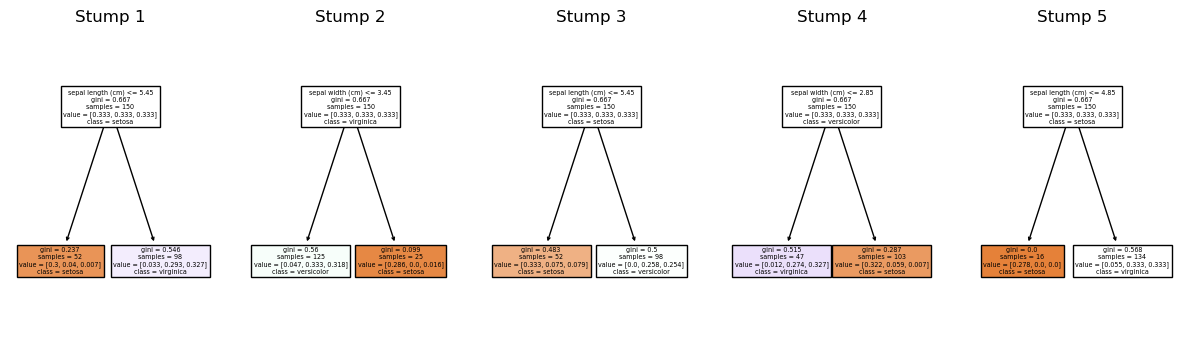

In [22]:
from sklearn.tree import plot_tree
# Plot each stump as a decision tree
fig, axes = plt.subplots(1, 5, figsize=(15, 4))  # Plot first 3 trees
for i, ax in enumerate(axes):
    clf = adaboost.estimators_[i]
    if isinstance(clf, DecisionTreeClassifier):
        plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, ax=ax)
        ax.set_title(f"Stump {i+1}")
    else:
        ax.set_visible(False)

In [23]:
print("📊 Stump Errors and Improvement:")

previous_error = None
for i, estimator in enumerate(estimators):
    pred = estimator.predict(X)
    error = np.mean(pred != y)
    
    if previous_error is not None:
        improvement = (previous_error - error) / previous_error * 100
        print(f"Stump {i+1}: Error = {error:.2f}, Improvement = {improvement:.2f}%")
    else:
        print(f"Stump {i+1}: Error = {error:.2f} (First stump)")
    
    previous_error = error


📊 Stump Errors and Improvement:
Stump 1: Error = 0.37 (First stump)
Stump 2: Error = 0.52, Improvement = -39.29%
Stump 3: Error = 0.41, Improvement = 21.79%
Stump 4: Error = 0.55, Improvement = -34.43%
Stump 5: Error = 0.56, Improvement = -2.44%


In [24]:
# Final model accuracy
final_pred = adaboost.predict(X)
final_error = np.mean(final_pred != y)
first_error = np.mean(estimators[0].predict(X) != y)

improvement_total = (first_error - final_error) / first_error * 100

print(f"\n🔍 Final AdaBoost Error: {final_error:.2f}")
print(f"\n🔍 Final AdaBoost Error: {first_error:.2f}")
print(f"🎯 Total Improvement from first stump: {improvement_total:.2f}%")



🔍 Final AdaBoost Error: 0.38

🔍 Final AdaBoost Error: 0.37
🎯 Total Improvement from first stump: -1.79%


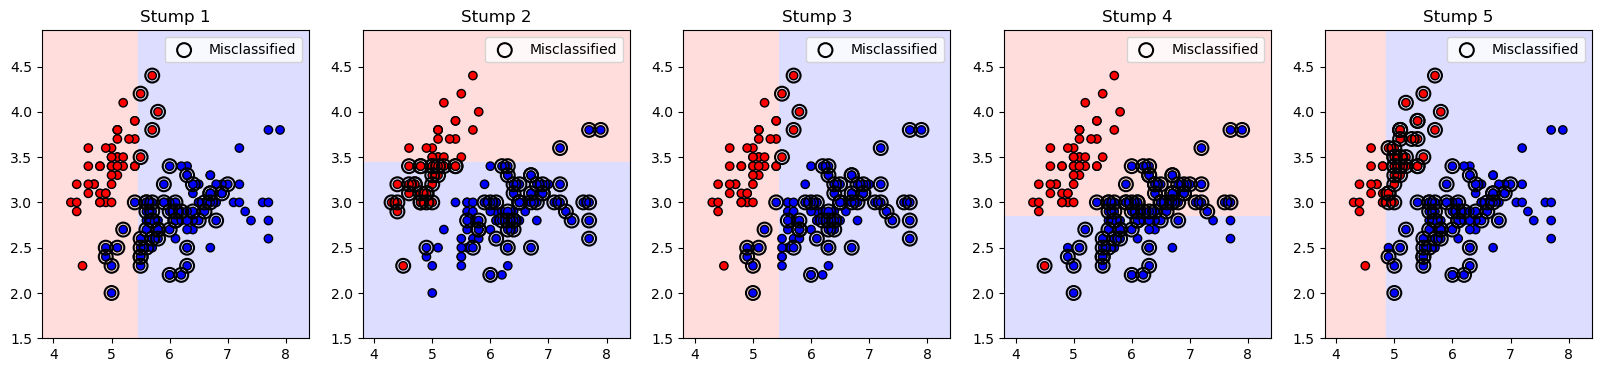

In [25]:
def plot_stump(ax, stump, X, y, title, previous_preds=None):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = stump.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.4)
    preds = stump.predict(X)
    misclassified = preds != y
    # Plot points, highlight misclassifications
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')
    ax.scatter(X[misclassified, 0], X[misclassified, 1], 
               s=100, facecolors='none', edgecolors='black', linewidths=1.5, label="Misclassified")
    ax.set_title(title)
    ax.legend(loc='upper right')
# 4. Plot each stump’s performance
fig, axes = plt.subplots(1, len(estimators), figsize=(20, 4))
for i, estimator in enumerate(estimators):
    plot_stump(axes[i], estimator, X, y, title=f"Stump {i+1}")
from sklearn.tree import plot_tree

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Load and preprocess data
iris = load_iris()
X, y = iris.data, iris.target

# For simplicity, use only 2 classes (binary classification)
X = X[y != 2]
y = y[y != 2]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
# AdaBoost with decision stumps
ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=42
)

ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 1.0


C:\Users\DIPTIRANJAN BISWAL\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [28]:
# Gradient Boosting (Stochastic by default with subsample < 1.0)
gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    subsample=0.8,         # stochastic part: use 80% of data per tree
    max_depth=3,
    random_state=42
)

gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbc))


Gradient Boosting Accuracy: 1.0


In [34]:
# Base models
log_clf = LogisticRegression(solver='liblinear')
tree_clf = DecisionTreeClassifier(max_depth=2)
svm_clf = SVC(probability=True)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('dt', tree_clf),
        ('svm', svm_clf)
    ],
    voting='hard'  # 'hard' uses predicted class labels, 'soft' uses probabilities
)

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)
print("Voting Ensemble Accuracy:", accuracy_score(y_test, y_pred_vote))


Voting Ensemble Accuracy: 1.0


In [33]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

